# Example 14 Analysis

We will plot the rate binned in energy deposition and compare it to the results of example 1 (which should be identical, by construction)

## Packages

In [1]:
import numpy as np

# some personal preferences for nice plots
%run "../../utilities/output_parser/plotter.ipynb"

# helpful functions for processing output
import sys
sys.path.append("../../utilities/output_parser")
import EXDMDataHandler
from EXDMDataHandler import EXDMData

## Data

In [2]:
data = EXDMData(filename = './output/EXDM_out_example_14.hdf5')

## Results

### Binned Scatter Rate

#### Data

In [3]:
[ E_bin_LHS, binned_scatter_rate_E ] = data.get_binned_scatter_rate_E(mass_MeV = 10**3, 
                                                                      med_FF = 0., 
                                                                      sigma_cm2 = 10**(-40),
                                                                      E_bin_width = 2.)

#### Plot

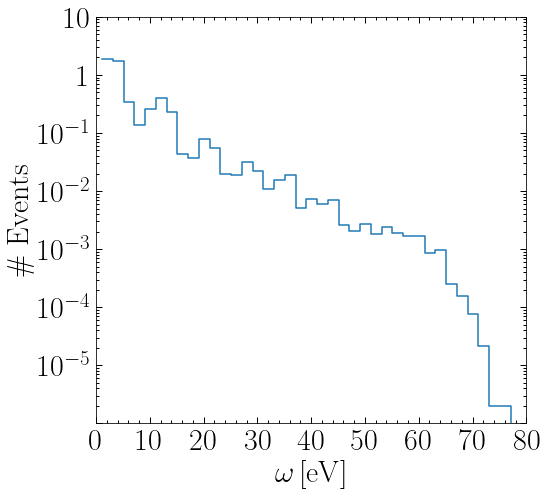

In [4]:
save_fig = True

fig, axes = plt.subplots(nrows=1, ncols=1, 
                             figsize=(7*1.1, 7))

E_min = 0
E_max = 80
dE = 10.

log_events_min = -6
log_events_max = 1

set_custom_tick_options(axes)
set_custom_axes(axes, 'x', E_min, E_max,
               ax_type = 'lin', 
               label = r'$\omega \, [\mathrm{eV}]$', 
               step = dE)
set_custom_axes(axes, 'y', log_events_min, log_events_max,
               ax_type = 'log', 
               label = r'$\# \ \mathrm{Events}$', 
               show_first = False)

axes.step(
    E_bin_LHS, 
    np.log10(binned_scatter_rate_E),
    where = 'post'
)

fig.tight_layout()
    
if save_fig:
    plt.savefig('./output/Si_binned_scatter_rate_2x2x2_SD.pdf', 
                bbox_inches='tight', pad_inches = 0.075)

plt.show()

### Cross Section Reach

#### Data

In [5]:
data_ex1 = EXDMData(filename = '../1/output/EXDM_out_example_1.hdf5')

[ E_bin_LHS_ex1, binned_scatter_rate_E_ex1 ] = data_ex1.get_binned_scatter_rate_E(mass_MeV = 10**3, 
                                                                      med_FF = 0., 
                                                                      sigma_cm2 = 10**(-40),
                                                                      E_bin_width = 2.)

#### Plot

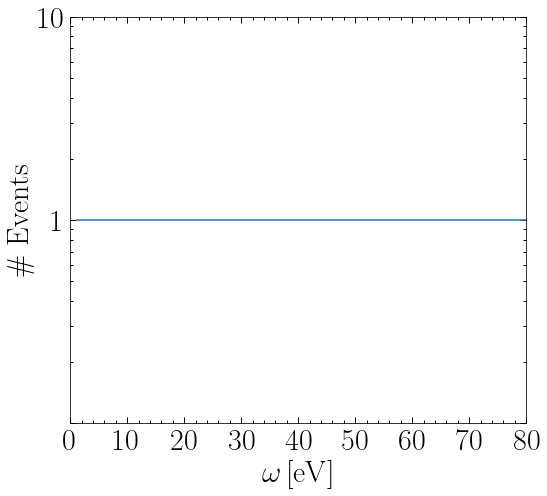

In [6]:
save_fig = True

fig, axes = plt.subplots(nrows=1, ncols=1, 
                             figsize=(7*1.1, 7))

E_min = 0
E_max = 80
dE = 10.

log_events_min = -1
log_events_max = 1

set_custom_tick_options(axes)
set_custom_axes(axes, 'x', E_min, E_max,
               ax_type = 'lin', 
               label = r'$\omega \, [\mathrm{eV}]$', 
               step = dE)
set_custom_axes(axes, 'y', log_events_min, log_events_max,
               ax_type = 'log', 
               label = r'$\# \ \mathrm{Events}$', 
               show_first = False)

axes.step(
    E_bin_LHS, 
    np.log10(binned_scatter_rate_E) - np.log10(binned_scatter_rate_E_ex1),
    where = 'post'
)

fig.tight_layout()
    
if save_fig:
    plt.savefig('./output/Si_binned_scatter_rate_2x2x2_SD_SI_compare.pdf', 
                bbox_inches='tight', pad_inches = 0.075)

plt.show()